{10: {'tp': 149057, 'tn': 149057, 'vp': 106419, 'vn': 106419, 'tsp': 37377, 'tsn': 37377}, 15: {'tp': 89731, 'tn': 89731, 'vp': 63999, 'vn': 63999, 'tsp': 22316, 'tsn': 22316}, 20: {'tp': 71109, 'tn': 71109, 'vp': 50830, 'vn': 50830, 'tsp': 17566, 'tsn': 17566}, 25: {'tp': 54563, 'tn': 54563, 'vp': 39187, 'vn': 39187, 'tsp': 13390, 'tsn': 13390}, 30: {'tp': 47858, 'tn': 47858, 'vp': 34307, 'vn': 34307, 'tsp': 11724, 'tsn': 11724}, 35: {'tp': 40110, 'tn': 40110, 'vp': 28720, 'vn': 28720, 'tsp': 9814, 'tsn': 9814}, 40: {'tp': 36705, 'tn': 36705, 'vp': 26217, 'vn': 26217, 'tsp': 8996, 'tsn': 8996}, 45: {'tp': 32207, 'tn': 32207, 'vp': 22996, 'vn': 22996, 'tsp': 7921, 'tsn': 7921}, 50: {'tp': 30167, 'tn': 30167, 'vp': 21421, 'vn': 21421, 'tsp': 7399, 'tsn': 7399}, 55: {'tp': 27162, 'tn': 27162, 'vp': 19217, 'vn': 19217, 'tsp': 6737, 'tsn': 6737}, 60: {'tp': 23482, 'tn': 23482, 'vp': 16086, 'vn': 16086, 'tsp': 6392, 'tsn': 6392}}
['10x10\n(100px)', '15x15\n(225px)', '20x20\n(400px)', '25x25

<ipython-input-2-80938b88e99b>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabel)


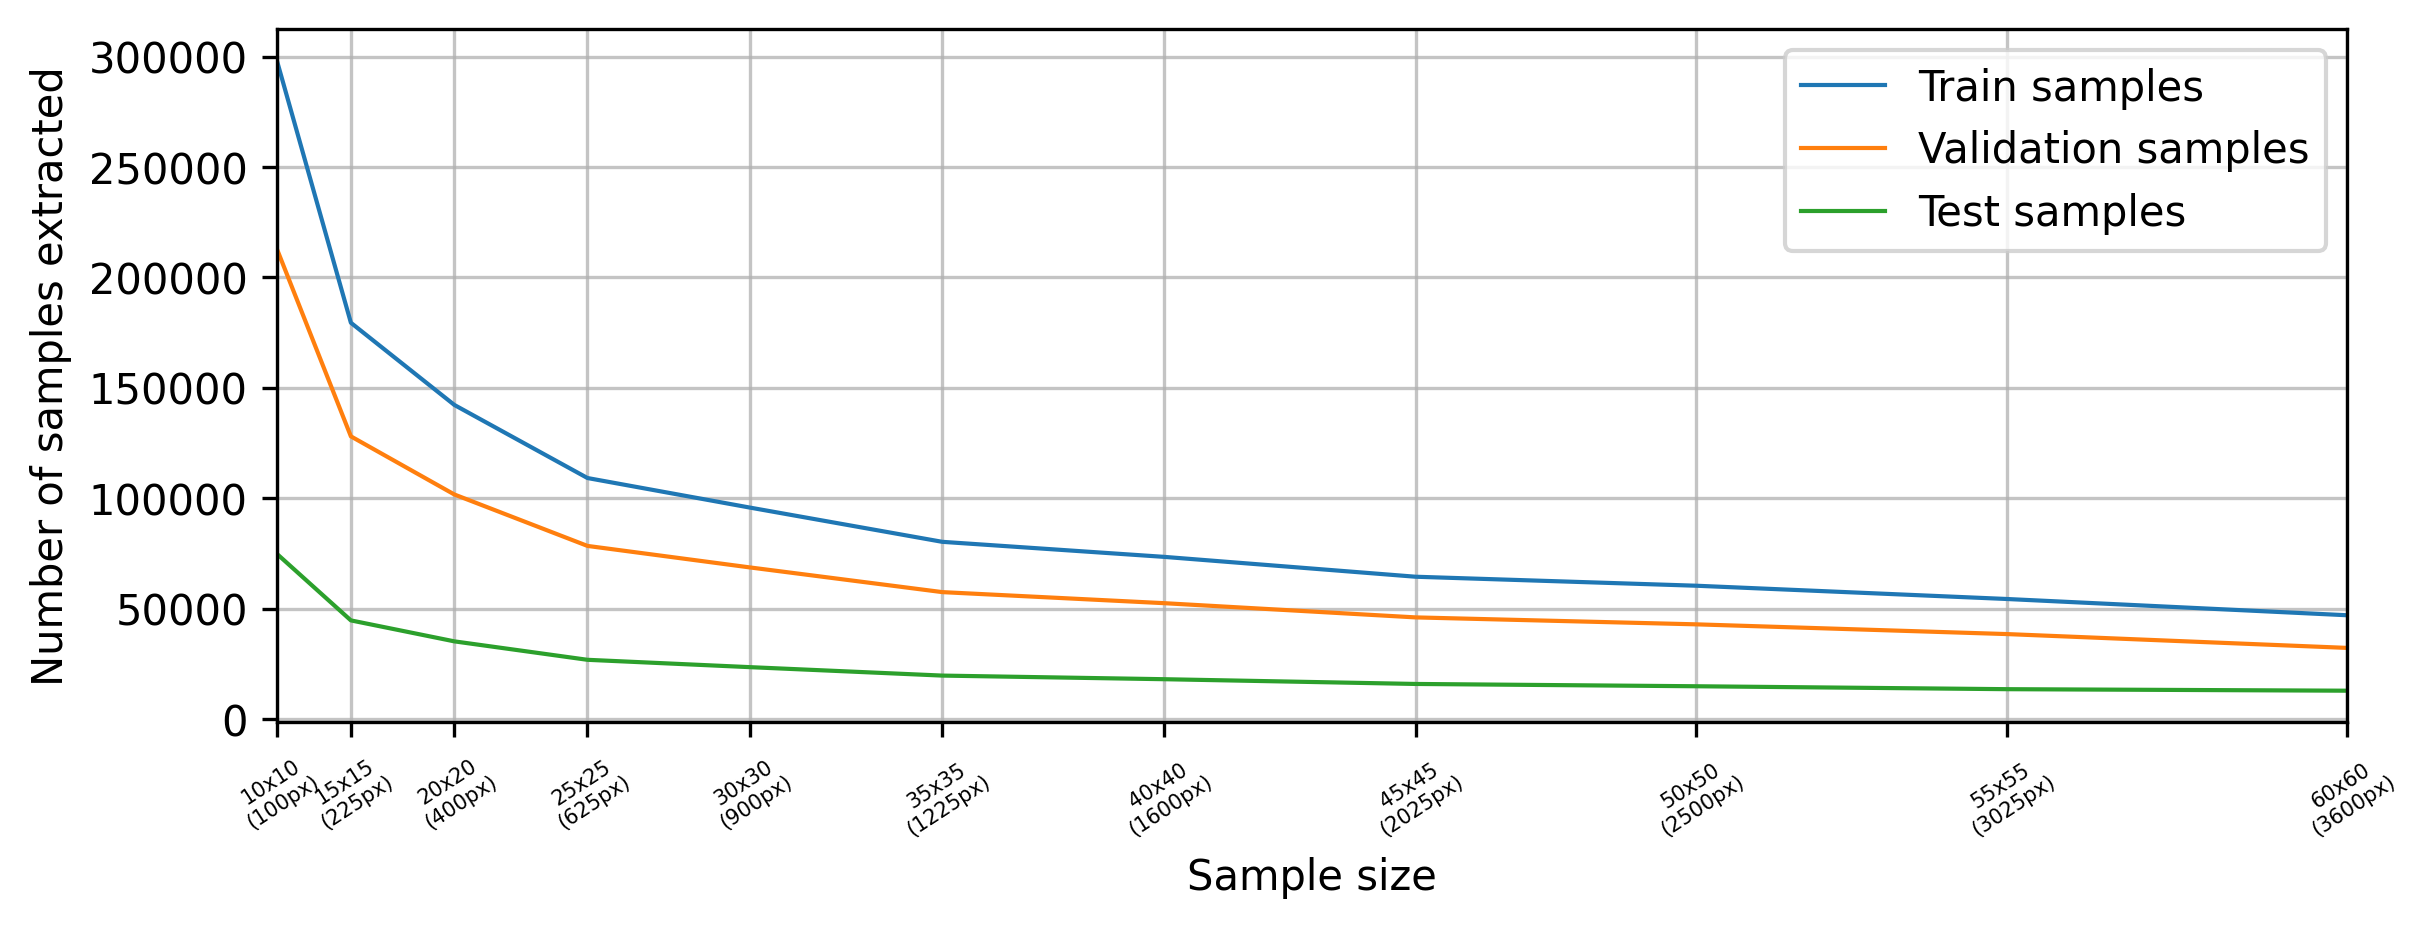

In [2]:
import matplotlib.pyplot as plt
from util_storage import loadObj
import os, json
import numpy as np
from matplotlib.pyplot import figure

%matplotlib inline

target_folder = './Minicist_V2/'

epoch = '0'



sizedict = {}

for window_size in os.listdir(target_folder):
    samples = loadObj(target_folder + window_size + '/' + epoch + '/num_images')
    
    sizedict[int(window_size)] = samples
print(sizedict)

f = figure(figsize=(8, 3), dpi=300)
ax = f.gca()    

names = {'tp':'Train samples','vp':'Validation samples','tsp':'Test samples'}

for feature in ['tp','vp','tsp']:
    x = []
    y = []
    xlabel = []
    
    for window_size in sizedict.keys():
        x.append(window_size*window_size)
        y.append(sizedict[window_size][feature]*2)
        xlabel.append("{}x{}\n({}px)".format(window_size,window_size,window_size*window_size))
        
    xlabel = [x for _, x in sorted(zip(x, xlabel), key=lambda pair: pair[0])]
    y = [x for _, x in sorted(zip(x, y), key=lambda pair: pair[0])]
    x = [x for _, x in sorted(zip(x, x), key=lambda pair: pair[0])]


    ax.plot(x, y,linewidth=1,label=names[feature])
    ax.set_xticklabels(xlabel)
ax.grid(which='both',alpha=0.75)
ax.set_xlim(min(x),max(x))





plt.xticks(x,rotation=33, fontsize=5)
print(xlabel)
plt.tight_layout()
ax.set_xlabel('Sample size')
ax.set_ylabel('Number of samples extracted')
plt.legend()
f.savefig('samples_second.png', dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=True, bbox_inches='tight', pad_inches=0,
        metadata=None)
plt.show()

    

        
    